# Support Vector Machine (SVM)

SVM is a supervised machine learning technique used for:

* Classification (most common)
* Regression (less common called SVR)

It works by finding the best boundary (called hyperplane) that separates the classes with maximum margin.

***Core Concepts***

1. Hyperplane

 A hyperplane is the decision boundary that separates two classes:
 $$ f(x) = w^Tx+b=0$$

 * w= weight vector, normal to the plane
 * b: bias term

2. Maximum Margin

 SVM seeks the hyperplane that maximizes the margin (distance between the support vectors of each class)

$$ Margin = \frac{2}{||w||}$$

  The classification constraints
 $$y_i(w^Tx_i+b)≥1  \;for \; all \; i \; $$

3. Support Vectors

 points that lie exactly on the margin boundaries and satisfy:
 $$ y_i(w^Tx_i+b)=1$$
 They define the hyperplane are critical for the model
4. Soft Margin and Regularization
 For non separable data, slack variable $\xi_i \ge 0$ are introduced,
 $$ \begin{align}
\min_{\mathbf{w}, b, \boldsymbol{\xi}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
\end{align}$$



*   C: Regularization parameter controlling trade-off between margin size and misclassification. (Penalty for misclassification)

| C Value    | Behavior                                                                         | Analogy                                   |
| ---------- | -------------------------------------------------------------------------------- | ----------------------------------------- |
| **High C** | Tries hard to classify every point correctly, **narrow margin**, may **overfit** | Strict teacher: punishes every mistake    |
| **Low C**  | Allows more margin violations, **wider margin**, may **underfit**                | Chill teacher: focuses on the big picture |



5. Kernel Trick

 A trick to convert non-linear data to higher dimensions so it becomes linearly separable
 $$K(x_i,x_j) = ϕ(x_i)^T ϕ(x_j) $$


  | Kernel           | When to Use                   | Shape         |
| ---------------- | ----------------------------- | ------------- |
| `linear`         | Linearly separable data       | straight line |
| `rbf` (Gaussian) | Non-linear, smooth boundaries | curve         |
| `poly`           | Polynomial boundaries         | curve         |
| `sigmoid`        | Like neural networks          | S-shaped      |


6. Gamma ($ γ $) in RBF Kernel
 Controls the influence of a single training example in the kernel space. (How far each point "sees")
$$ k(x,z) = exp(-\gamma||x-z ||^2)$$

* Low γ → smooth boundary (underfit)

* High γ → complex boundary (overfit)



In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df =pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


# Adding Taget and Target name columns

In [ ]:
iris_df['target']=iris.target
iris_df['target_name']=iris_df['target'].map(lambda x:iris.target_names[x])

print(iris_df.drop(['target','target_name'], axis=1).corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


#  Boxplot by Class: Visualize Feature Distribution

***Introduction to Box Plot***

A box plot (or box-and-whisker plot) is a standardized way of visualizing the distribution, central tendency, and variability of a dataset.

It displays the five-number summary:

* Minimum (non-outlier)

* Q1 (25th percentile)

* Median (Q2 / 50th percentile)

* Q3 (75th percentile)

* Maximum (non-outlier)

Outliers beyond the whiskers are plotted as individual points.



Text(0.5, 1.0, 'Petal Length Distribution by Species')

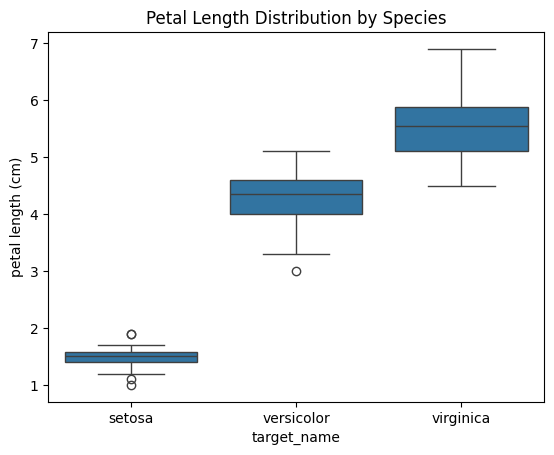

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='target_name',y='petal length (cm)', data = iris_df)
plt.title('Petal Length Distribution by Species')



# Explanation

1. Setosa

  Petal length tightly clustered around 1.4–1.6 cm

  Very narrow IQR (box is short)

  A few outliers below (near 1.0 cm)

  Clear margin separating it from other species


**Conclusion:**
> Setosa is well-separated. Petal length alone could perfectly classify it.

2. Versicolor

  Median around 4.35 cm

  Wider spread (approx. 3.1 to 5.1 cm)

  Slight overlap with Virginica

  1 visible outlier (lower side)

***Conclusion:***
> Versicolor shows moderate spread.
It may partially overlap with Virginica in classification.

3. Virginica

  Median around 5.6 cm

  Range: approx. 4.5 to 6.9 cm

  Highest petal lengths in dataset

  No outliers

***Conclusion:***

> Virginica is also well-clustered at the high end.
There is some border contact with Versicolor, but still distinguishable.

#  Pairplot: All-Pairs Feature Relationships

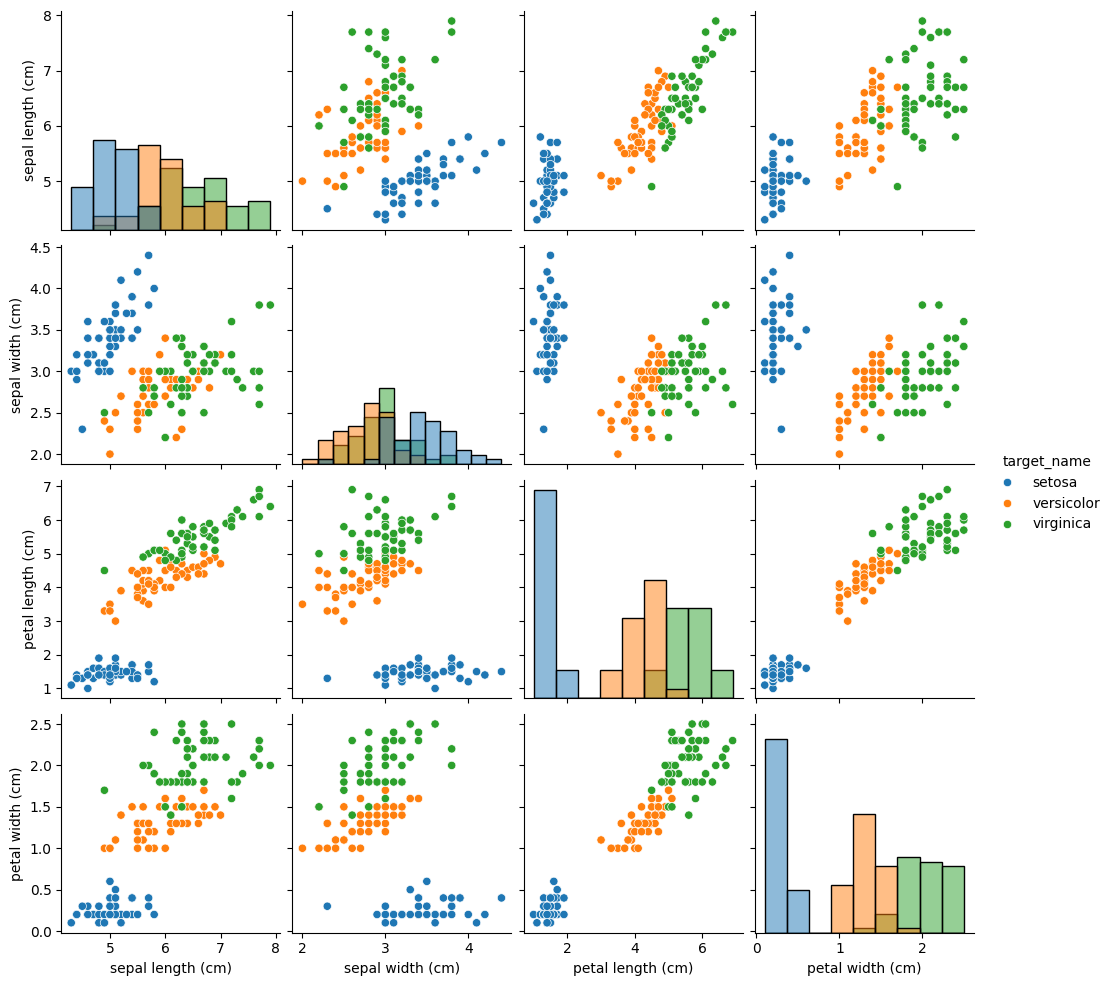

In [ ]:
sns.pairplot(iris_df.drop(['target'],axis=1),hue='target_name', diag_kind='hist')

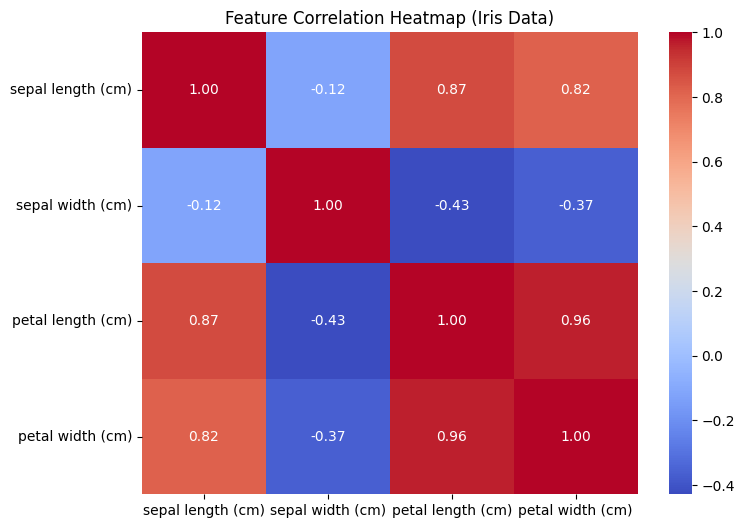

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
iris_numeric = iris_df.drop(['target', 'target_name'], axis=1)

# Compute correlation matrix
corr = iris_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Iris Data)")
plt.show()


| Feature Pair                     | Correlation       | What It Means                                                             |
| -------------------------------- | ----------------- | ------------------------------------------------------------------------- |
| `petal length` vs `petal width`  | **0.96**          | Very strong positive correlation → they grow together; maybe redundant |
| `sepal length` vs `petal length` | **0.87**          | Strong relationship → related features                                    |
| `sepal length` vs `petal width`  | **0.82**          | High correlation as well                                                  |
| `sepal width` vs all others      | \~ -0.12 to -0.43 |  Weak or negative correlation → more independent feature                |


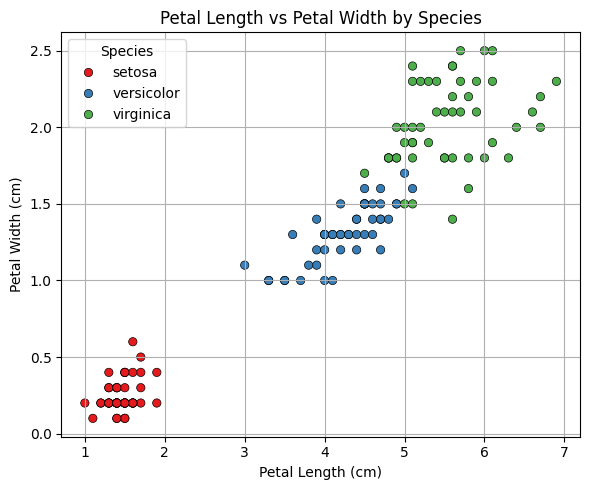

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot petal length vs. petal width by species
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='target_name',
    palette='Set1',
    edgecolor='k'
)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


# Draw hyperline on this data

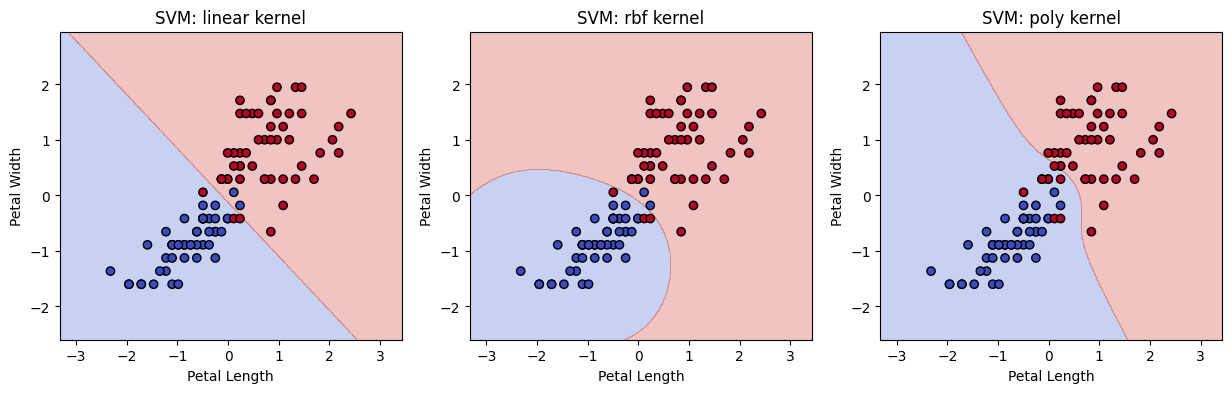

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#use only 2 features for visualization
X=iris_df[['petal length (cm)','petal width (cm)']].values #equivalent to np.array
y=iris_df['target'].values

#chosing setosa and verginica

X=X[y!=0]
y=y[y!=0]

#Scale Function
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear','rbf','poly']

plt.figure(figsize=(15,4))

for i,kernels in enumerate (kernels,1):
 model=SVC(kernel=kernels,C=1,gamma='auto')
 model.fit(X_scaled,y)

 x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
 y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
 xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min, y_max, 500))
#The decision boundary is implicitly defined where the model's predicted class changes
# — so you evaluate predictions over a grid of (x, y) points and reshape them to visualize that transition.
 Z= model.predict(np.c_[xx.ravel(),yy.ravel()])
 # shaping z in the form of xx
 Z=Z.reshape(xx.shape)

 plt.subplot(1,3,i)
 plt.contourf(xx,yy,Z,alpha = 0.3, cmap='coolwarm')
 plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap='coolwarm', edgecolor='k')
 plt.title(f"SVM: {kernels} kernel")
 plt.xlabel('Petal Length')
 plt.ylabel('Petal Width')


# Find the best combination of C, gamma and kernel

In [ ]:
from sklearn.model_selection import GridSearchCV

# define parameter grid

param_grid = {
    'C':np.linspace(0.01,1,10),
    'gamma':np.linspace(0.001,0.1,1),
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)
grid.fit(X_scaled,y)
results = pd.DataFrame(grid.cv_results_)


# Output best model
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': np.float64(0.01), 'gamma': np.float64(0.001), 'kernel': 'rbf'} SVC(C=np.float64(0.01), gamma=np.float64(0.001))


# Prediction

In [ ]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_scaled)


#Model Evaluation

$$F_1 \; Score = 2 \times\frac{Precision \times Recall}{Precision + Recall}
$$

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


[[48  2]
 [ 3 47]]
              precision    recall  f1-score   support

           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# new raw values

In [ ]:
new_sample = np.array([[4.5, 1.5]])
new_sample_scaled = scaler.transform(new_sample)
prediction = best_model.predict(new_sample_scaled)
print("Predicted class:", prediction)


Predicted class: [1]


#  Multiclass SVM on Full Iris Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load full Iris dataset
iris = load_iris()
X = iris.data                  # all 4 features
y = iris.target                # all 3 classes (0,1,2)

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

# 4. GridSearchCV for best model
grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True)
grid.fit(X_scaled, y)

# 5. Predict
best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled)

# 6. Evaluation
print("Best Parameters:", grid.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=iris.target_names))

# 7. Optional: Predict on new sample
new_sample = np.array([[5.5, 3.0, 4.2, 1.3]])  # Change as needed
scaled_sample = scaler.transform(new_sample)
print("\nPrediction for new sample:", iris.target_names[best_model.predict(scaled_sample)[0]])


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Confusion Matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.98      0.98        50
   virginica       0.98      0.98      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Prediction for new sample: versicolor


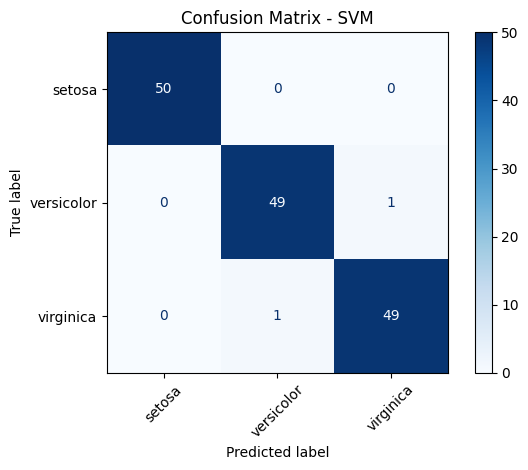

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_scaled, y,
                                      display_labels=iris.target_names,
                                      cmap='Blues',
                                      xticks_rotation=45)
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()


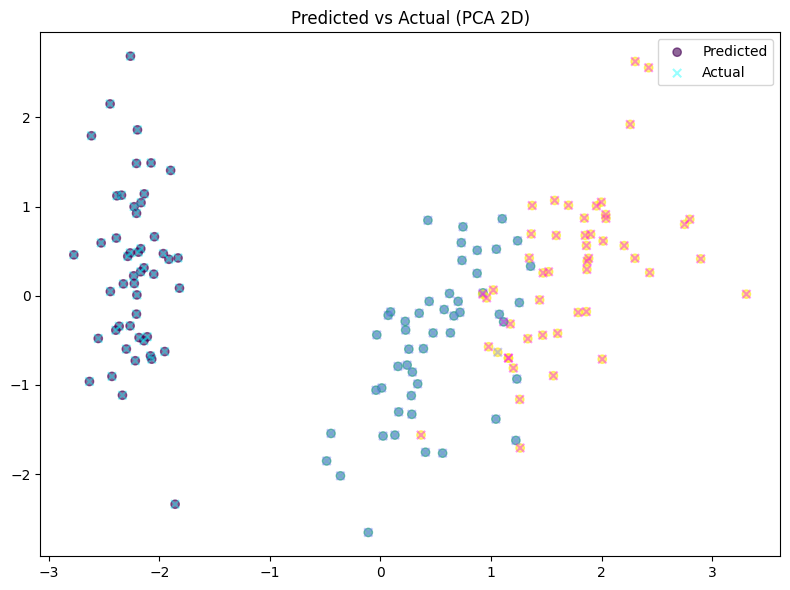

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', marker='o', label='Predicted', alpha=0.6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='cool', marker='x', label='Actual', alpha=0.4)
plt.title("Predicted vs Actual (PCA 2D)")
plt.legend()
plt.tight_layout()
plt.show()


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


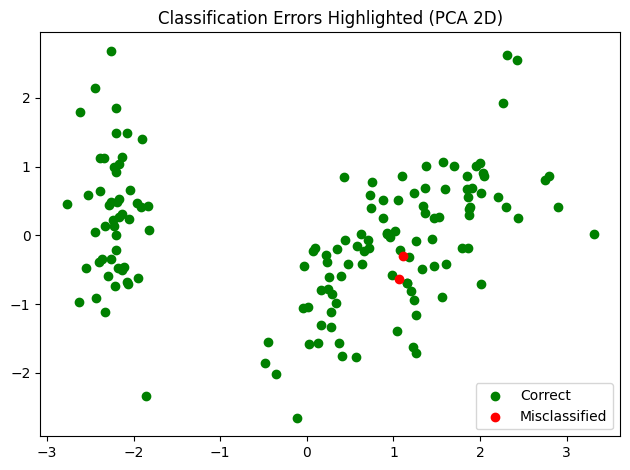

In [ ]:
errors = y != y_pred
print(~errors)
plt.scatter(X_pca[~errors, 0], X_pca[~errors, 1], c='green', label='Correct')
plt.scatter(X_pca[errors, 0], X_pca[errors, 1], c='red', label='Misclassified')
plt.legend()
plt.title("Classification Errors Highlighted (PCA 2D)")
plt.tight_layout()
plt.show()
